# 2440086155_FinalExam

**Thursday, July 14, 2022.**

**Student Name**  :SHAREN IVANA   
**Student ID**    :2440086155     
**Video Link**    :.................    

* [Dataset Link](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data)
## <strong>Dataset Description</strong>
<br>
 <strong>a record of the crimes that have occurred in Chicago</strong>
 <br>
<ul><li><strong>Domestic :</strong> Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.</li>
    <li><strong>Beat :</strong> Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.</li>
    <li><strong>District :</strong> Indicates the police district where the incident occurred</li>
    <li><strong>Ward :</strong> The ward(City Council District) where the incident occurred</li>
    <li><strong>Community Are :</strong> Indicates the community area where the incident occurred. Chicago has 77 community areas.</li>
    <li><strong>FBI Code :</strong> Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).</li>
    <li><strong>Date :</strong> A given month (1 : January, 12 : December); a given hour (1 to 23)</li>
</ul>

**NOTES:**
<li>You are required to build <strong>'the BEST and suitable'</strong> supervised machine learning model for the given dataset. The model may be used for the effective deployment of police officers in a city across several districts regarding the degree to which each area is prone to crime at a particular hour, day, and month. </li>
<li>Build multiple potentially suitable machine learning models (at least 2 different machine learning models).</li>
<li>You have to evaluate the models using at least 2 performance metrics before choose what you assume to be the `"best"` model for the given dataset.</li>

**HINT:** 
1. You need to generate the target feature by **performing feature engineering on `Date` and `Primary Type` features** to group crimes together
<br>
2. Level of Crime Rate:
<ul><li><strong>0-14 : </strong>Low Crime Rate</li>
<li><strong>15-33 : </strong>Medium Crime Rate</li>
<li><strong>34 and above : </strong>High Crime Rate</li>
<br>
3. You may need to check the data proportion in each class (imbalance/not)

## 1. Load the neccessary Libraries and Data (2 pts.)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from math import remainder
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Data Exploration (15 pts.)

**Import dataset Sharen_Odd**

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
Sharen_Odd = pd.read_csv('/content/gdrive/My Drive/Dataset UAS ML/OddID.csv')
Sharen_Odd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,1024161,11254362,JB183495,03/12/2018 07:32:00 PM,017XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,RESTAURANT,False,...,1.0,24.0,08A,1164432.0,1905388.0,2018,05/04/2018 03:51:04 PM,41.896002,-87.671521,"(41.896002063, -87.671521286)"
1,428801,10540177,HZ285387,05/29/2016 11:28:00 PM,027XX S STATE ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,CHA APARTMENT,True,...,3.0,35.0,08B,1176730.0,1886544.0,2016,02/10/2018 03:50:01 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
2,1099812,11624449,JC187320,03/16/2019 02:10:00 AM,101XX S PRINCETON AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,9.0,49.0,03,1176072.0,1837879.0,2019,03/23/2019 04:03:16 PM,41.710497,-87.630797,"(41.710496583, -87.630796959)"
3,595228,11109388,JA459177,10/05/2017 11:00:00 AM,019XX W OGDEN AVE,0810,THEFT,OVER $500,HOSPITAL BUILDING/GROUNDS,False,...,2.0,28.0,06,1163312.0,1897077.0,2017,02/10/2018 03:50:01 PM,41.873220,-87.675869,"(41.873219626, -87.675868666)"
4,1033611,11241624,JB166623,02/26/2018 07:51:00 PM,067XX S COTTAGE GROVE AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,...,20.0,42.0,26,1182717.0,1860597.0,2018,05/04/2018 03:51:04 PM,41.772686,-87.605758,"(41.77268594, -87.605758495)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031739,540482,11182652,JA556030,12/19/2017 08:10:00 PM,076XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,...,8.0,69.0,08B,1183553.0,1854644.0,2017,05/04/2018 03:51:04 PM,41.756331,-87.602879,"(41.756330877, -87.602879293)"
1031740,750276,10880463,JA189513,03/16/2017 01:00:00 PM,028XX N MOBILE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,29.0,19.0,08B,1133917.0,1918303.0,2017,02/10/2018 03:50:01 PM,41.932034,-87.783294,"(41.932033636, -87.783293785)"
1031741,122985,10157277,HY346558,07/18/2015 09:30:00 PM,072XX S LOWE AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,17.0,68.0,05,1173398.0,1856921.0,2015,02/10/2018 03:50:01 PM,41.762810,-87.640028,"(41.762809823, -87.640027854)"
1031742,929773,11383727,JB354262,07/17/2018 10:56:00 PM,063XX S PEORIA DR,2021,NARCOTICS,POSS: BARBITUATES,STREET,True,...,16.0,68.0,18,1171390.0,1862990.0,2018,07/24/2018 04:15:32 PM,41.779508,-87.647210,"(41.779508069, -87.647210037)"


**menampilkan 10 data teratas dari dataset Sharen_Odd**

In [3]:
Sharen_Odd.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,1024161,11254362,JB183495,03/12/2018 07:32:00 PM,017XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,RESTAURANT,False,...,1.0,24.0,08A,1164432.0,1905388.0,2018,05/04/2018 03:51:04 PM,41.896002,-87.671521,"(41.896002063, -87.671521286)"
1,428801,10540177,HZ285387,05/29/2016 11:28:00 PM,027XX S STATE ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,CHA APARTMENT,True,...,3.0,35.0,08B,1176730.0,1886544.0,2016,02/10/2018 03:50:01 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
2,1099812,11624449,JC187320,03/16/2019 02:10:00 AM,101XX S PRINCETON AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,9.0,49.0,03,1176072.0,1837879.0,2019,03/23/2019 04:03:16 PM,41.710497,-87.630797,"(41.710496583, -87.630796959)"
3,595228,11109388,JA459177,10/05/2017 11:00:00 AM,019XX W OGDEN AVE,0810,THEFT,OVER $500,HOSPITAL BUILDING/GROUNDS,False,...,2.0,28.0,06,1163312.0,1897077.0,2017,02/10/2018 03:50:01 PM,41.873220,-87.675869,"(41.873219626, -87.675868666)"
4,1033611,11241624,JB166623,02/26/2018 07:51:00 PM,067XX S COTTAGE GROVE AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,...,20.0,42.0,26,1182717.0,1860597.0,2018,05/04/2018 03:51:04 PM,41.772686,-87.605758,"(41.77268594, -87.605758495)"
5,954838,11349522,JB309088,06/16/2018 07:00:00 AM,063XX N WAYNE AVE,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,False,...,40.0,77.0,06,1166144.0,1942240.0,2018,06/23/2018 03:54:12 PM,41.997089,-87.664177,"(41.997089263, -87.664176814)"
6,319779,10716523,HZ474727,10/14/2016 02:00:00 PM,042XX W 31ST ST,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,...,22.0,30.0,06,1148402.0,1883698.0,2016,02/10/2018 03:50:01 PM,41.836806,-87.730955,"(41.836806313, -87.73095549)"
7,886493,11441117,JB428604,09/09/2018 02:10:00 PM,0000X S STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,...,42.0,32.0,06,1176390.0,1900234.0,2018,09/16/2018 04:05:04 PM,41.881598,-87.627758,"(41.881597699, -87.627758082)"
8,918820,11398123,JB372965,07/31/2018 01:00:00 PM,006XX E GRAND AVE,0484,BATTERY,PRO EMP HANDS NO/MIN INJURY,SIDEWALK,True,...,42.0,8.0,08B,1180796.0,1904058.0,2018,08/07/2018 04:02:59 PM,41.891990,-87.611462,"(41.891990384, -87.611461502)"
9,17633,10335273,HY526308,12/05/2015 08:10:00 PM,027XX N MOODY AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,29.0,19.0,08B,1134936.0,1917512.0,2015,02/10/2018 03:50:01 PM,41.929845,-87.779568,"(41.929845042, -87.779567812)"


**Menampilkan 10 data terbawah dari dataset Sharen_Odd**

In [4]:
Sharen_Odd.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1031734,998679,11291299,JB231971,04/21/2018 01:12:00 AM,058XX S FAIRFIELD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,16.0,63.0,14,1159043.0,1865731.0,2018,05/04/2018 03:51:04 PM,41.787291,-87.692401,"(41.787291181, -87.692400898)"
1031735,95349,10205821,HY392671,08/22/2015 09:20:00 AM,029XX W 63RD ST,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,...,15.0,66.0,06,1157549.0,1862716.0,2015,02/10/2018 03:50:01 PM,41.779048,-87.697960,"(41.77904802, -87.697960471)"
1031736,205306,10016465,HY205929,03/31/2015 10:00:00 PM,037XX W DICKENS AVE,0820,THEFT,$500 AND UNDER,STREET,False,...,26.0,22.0,06,1151096.0,1913695.0,2015,02/10/2018 03:50:01 PM,41.919069,-87.720284,"(41.919069102, -87.720283809)"
1031737,249662,9936233,HY124991,01/22/2015 06:25:00 PM,009XX W NORTH AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,...,32.0,8.0,06,1169678.0,1910842.0,2015,02/10/2018 03:50:01 PM,41.910856,-87.652095,"(41.910855509, -87.652094846)"
1031738,231171,9969662,HY159284,02/21/2015 06:15:00 PM,040XX W MADISON ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,...,28.0,26.0,03,1149481.0,1899707.0,2015,02/10/2018 03:50:01 PM,41.880716,-87.726581,"(41.880716129, -87.726581034)"
1031739,540482,11182652,JA556030,12/19/2017 08:10:00 PM,076XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,...,8.0,69.0,08B,1183553.0,1854644.0,2017,05/04/2018 03:51:04 PM,41.756331,-87.602879,"(41.756330877, -87.602879293)"
1031740,750276,10880463,JA189513,03/16/2017 01:00:00 PM,028XX N MOBILE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,29.0,19.0,08B,1133917.0,1918303.0,2017,02/10/2018 03:50:01 PM,41.932034,-87.783294,"(41.932033636, -87.783293785)"
1031741,122985,10157277,HY346558,07/18/2015 09:30:00 PM,072XX S LOWE AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,17.0,68.0,05,1173398.0,1856921.0,2015,02/10/2018 03:50:01 PM,41.762810,-87.640028,"(41.762809823, -87.640027854)"
1031742,929773,11383727,JB354262,07/17/2018 10:56:00 PM,063XX S PEORIA DR,2021,NARCOTICS,POSS: BARBITUATES,STREET,True,...,16.0,68.0,18,1171390.0,1862990.0,2018,07/24/2018 04:15:32 PM,41.779508,-87.647210,"(41.779508069, -87.647210037)"
1031743,337187,10689428,HZ443522,09/21/2016 01:10:00 PM,029XX N BROADWAY,1330,CRIMINAL TRESPASS,TO LAND,SMALL RETAIL STORE,False,...,44.0,6.0,26,1171744.0,1919789.0,2016,02/10/2018 03:50:01 PM,41.935361,-87.644241,"(41.935361214, -87.644241031)"


**Menampilkan shape dari dataset Sharen_Odd**

In [5]:
Sharen_Odd.shape

(1031744, 23)

Sharen_Odd.shape berfungsi untuk menjelaskan bentuk array saat ini. Numpy akan memberi tahu bahwa dataset Sharen_Odd kita terdiri dari 1031744 baris dan 23 kolom.

**Menampilkan info dari dataset Sharen_Odd**

In [6]:
Sharen_Odd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031744 entries, 0 to 1031743
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1031744 non-null  int64  
 1   ID                    1031744 non-null  int64  
 2   Case Number           1031744 non-null  object 
 3   Date                  1031744 non-null  object 
 4   Block                 1031744 non-null  object 
 5   IUCR                  1031744 non-null  object 
 6   Primary Type          1031744 non-null  object 
 7   Description           1031744 non-null  object 
 8   Location Description  1028477 non-null  object 
 9   Arrest                1031744 non-null  bool   
 10  Domestic              1031744 non-null  bool   
 11  Beat                  1031744 non-null  int64  
 12  District              1031743 non-null  float64
 13  Ward                  1031738 non-null  float64
 14  Community Area        1031742 non-

In [7]:
Sharen_Odd.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Dari hasil diatas, diketahui terdapat 2 variabel dengan tipe data BOOL, 7 variabel dengan tipe data FLOAT, 4 variabel dengan tipe data INT, dan 10 variabel dengan tipe data OBJECT.

**Menampilkan deskripsi data dari dataset Sharen_Odd**

In [8]:
Sharen_Odd.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.031744e+06,1.031744e+06,1.031744e+06,1.031743e+06,1.031738e+06,1.031742e+06,1.019181e+06,1.019181e+06,1.031744e+06,1.019181e+06,1.019181e+06
mean,5.734502e+05,1.081694e+07,1.144468e+03,1.121607e+01,2.316172e+01,3.686135e+01,1.164729e+06,1.886285e+06,2.016676e+03,4.184356e+01,-8.767101e+01
std,3.308943e+05,7.250323e+05,6.942233e+02,6.934780e+00,1.398308e+01,2.141199e+01,1.622861e+04,3.118423e+04,1.248647e+00,8.576025e-02,5.908040e-02
min,0.000000e+00,2.171400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.092706e+06,1.813897e+06,2.015000e+03,4.164459e+01,-8.793427e+01
25%,2.869228e+05,1.040797e+07,6.120000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152955e+06,1.859226e+06,2.016000e+03,4.176901e+01,-8.771377e+01
50%,5.737245e+05,1.087063e+07,1.031000e+03,1.000000e+01,2.400000e+01,3.200000e+01,1.166471e+06,1.893489e+06,2.017000e+03,4.186338e+01,-8.766459e+01
75%,8.598735e+05,1.127863e+07,1.713000e+03,1.700000e+01,3.400000e+01,5.400000e+01,1.176417e+06,1.908739e+06,2.018000e+03,4.190535e+01,-8.762788e+01
max,1.146380e+06,1.168250e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.019000e+03,4.202267e+01,-8.752453e+01


Dari hasil diatas, ditampilkan basic statistical data dari dataset Sharen_Odd, dimana terdapat masing-masing nilai mean, standar deviasi, maximum, minimum, dan masi banyak lagi dari setiap kolomnya.

**Menampilkan urutan menurun sehingga elemen pertama adalah elemen yang paling sering muncul**

In [9]:
Sharen_Odd.value_counts()

Unnamed: 0  ID        Case Number  Date                    Block                  IUCR  Primary Type        Description                          Location Description               Arrest  Domestic  Beat  District  Ward  Community Area  FBI Code  X Coordinate  Y Coordinate  Year  Updated On              Latitude   Longitude   Location                     
1           10365064  HZ100370     12/31/2015 11:59:00 PM  075XX S EMERALD AVE    1320  CRIMINAL DAMAGE     TO VEHICLE                           STREET                             False   False     621   6.0       17.0  68.0            14        1172605.0     1854931.0     2015  02/10/2018 03:50:01 PM  41.757367  -87.642993  (41.757366519, -87.642992854)    1
765866      10855197  JA160258     02/20/2017 12:12:00 AM  0000X W JACKSON BLVD   0460  BATTERY             SIMPLE                               STREET                             False   False     113   1.0       42.0  32.0            08B       1176349.0     1898987.0     2017  0

**Melihat kolom-kolom pada dataset Sharen_Odd**

In [10]:
Sharen_Odd.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

**Mengubah spasi menjadi underscore untuk memudahkan pengerjaan**

In [11]:
Sharen_Odd.columns = Sharen_Odd.columns.str.replace(' ','_')

In [12]:
Sharen_Odd.columns

Index(['Unnamed:_0', 'ID', 'Case_Number', 'Date', 'Block', 'IUCR',
       'Primary_Type', 'Description', 'Location_Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community_Area', 'FBI_Code',
       'X_Coordinate', 'Y_Coordinate', 'Year', 'Updated_On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

**Melihat index pada dataset Sharen_Odd**

In [13]:
Sharen_Odd.index

RangeIndex(start=0, stop=1031744, step=1)

**Mengecek missing value pada dataset Sharen_Odd**

In [14]:
Sharen_Odd.isna().sum()

Unnamed:_0                  0
ID                          0
Case_Number                 0
Date                        0
Block                       0
IUCR                        0
Primary_Type                0
Description                 0
Location_Description     3267
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                        6
Community_Area              2
FBI_Code                    0
X_Coordinate            12563
Y_Coordinate            12563
Year                        0
Updated_On                  0
Latitude                12563
Longitude               12563
Location                12563
dtype: int64

Dari hasil diatas, terdapat missing value pada kolom Location Description, X Coordinate, Y Coordinate, Latitude, Longitude, dan Location.

**Mem-plot histogram dari dataset Sharen_Odd**

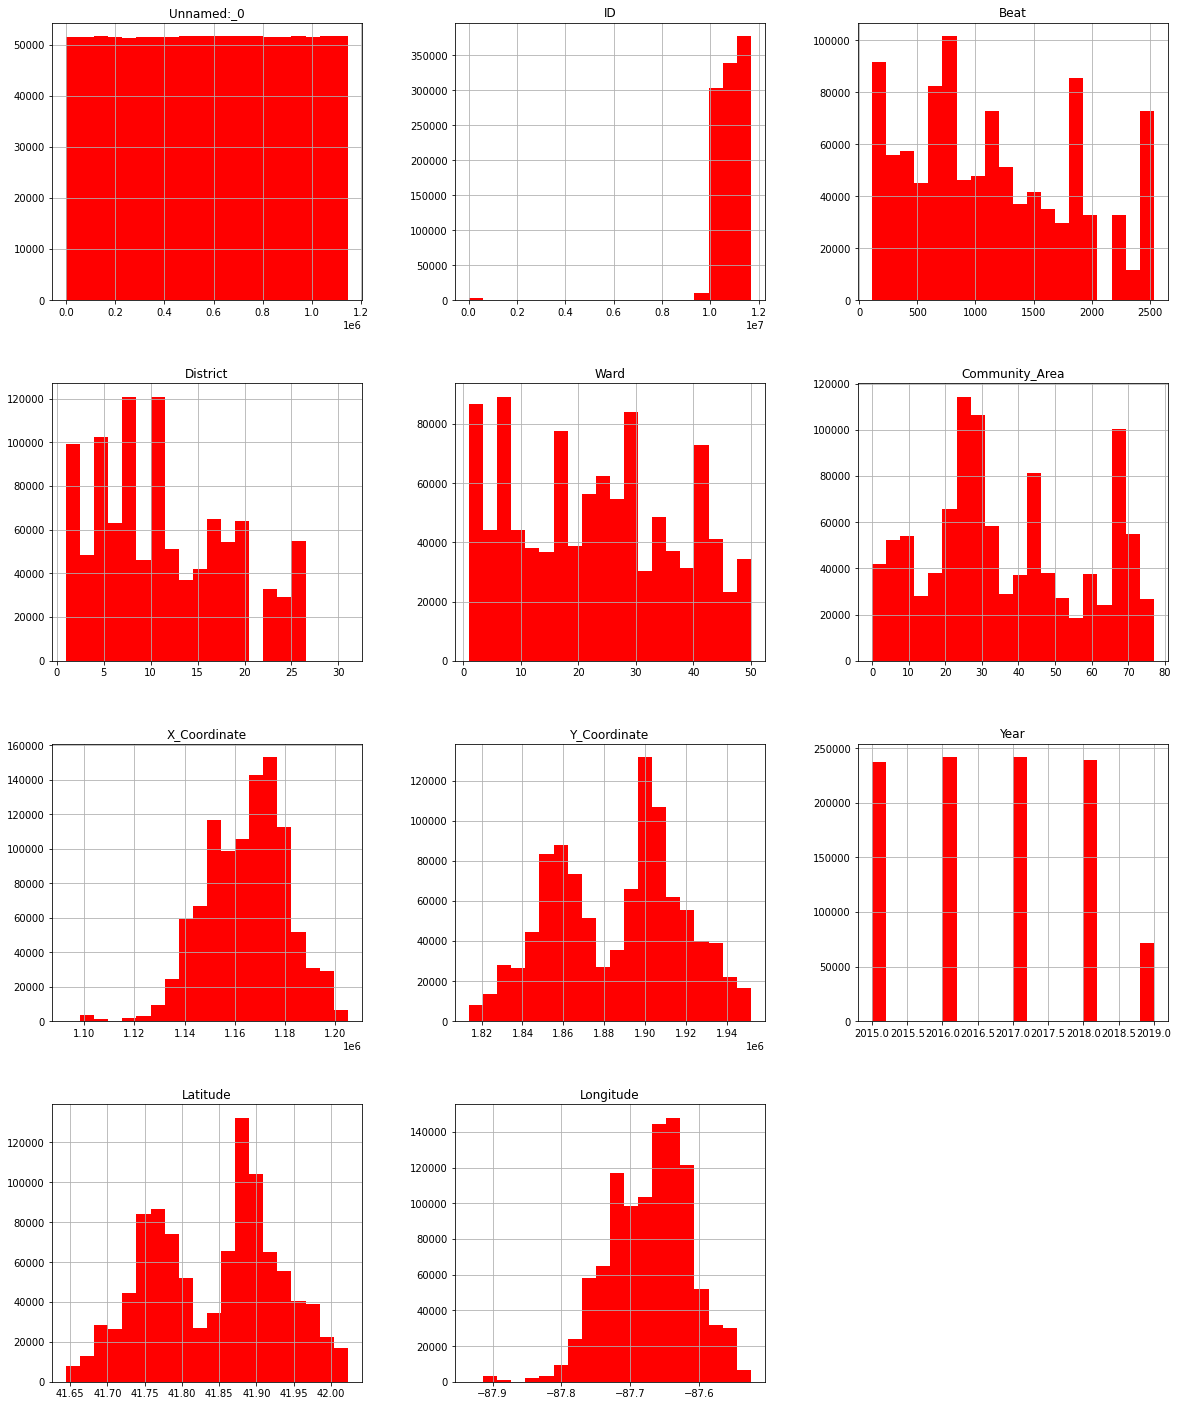

In [15]:
Sharen_Odd.hist(bins = 20, figsize = (20,25), color = 'red');

**Melihat korelasi antar variabel pada dataset Sharen_Odd**

In [16]:
Sharen_Odd.corr(method ='kendall')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,Unnamed:_0,ID,Arrest,Domestic,Beat,District,Ward,Community_Area,X_Coordinate,Y_Coordinate,Year,Latitude,Longitude
Unnamed:_0,1.000000,0.559896,-0.031282,0.007419,-0.002323,-0.002307,0.009396,-0.008853,0.009591,0.005769,0.882413,0.005698,0.009790
ID,0.559896,1.000000,-0.047354,0.003247,-0.000905,-0.000821,0.012025,-0.012500,0.011623,0.009711,0.872653,0.009618,0.011910
Arrest,-0.031282,-0.047354,1.000000,-0.035033,-0.021422,-0.022149,-0.016414,0.030693,-0.026610,-0.038524,-0.042087,-0.038288,-0.027403
Domestic,0.007419,0.003247,-0.035033,1.000000,-0.047870,-0.049191,-0.063943,0.080018,0.010511,-0.092558,0.006490,-0.092282,0.009004
Beat,-0.002323,-0.000905,-0.021422,-0.047870,1.000000,0.977206,0.532823,-0.403116,-0.408871,0.496054,-0.002374,0.496908,-0.405916
District,-0.002307,-0.000821,-0.022149,-0.049191,0.977206,1.000000,0.551323,-0.427770,-0.437463,0.534512,-0.002336,0.535538,-0.434233
Ward,0.009396,0.012025,-0.016414,-0.063943,0.532823,0.551323,1.000000,-0.391055,-0.305512,0.480243,0.011683,0.480392,-0.301118
Community_Area,-0.008853,-0.012500,0.030693,0.080018,-0.403116,-0.427770,-0.391055,1.000000,0.234338,-0.708108,-0.011703,-0.707831,0.226780
X_Coordinate,0.009591,0.011623,-0.026610,0.010511,-0.408871,-0.437463,-0.305512,0.234338,1.000000,-0.375282,0.012056,-0.377595,0.991391
Y_Coordinate,0.005769,0.009711,-0.038524,-0.092558,0.496054,0.534512,0.480243,-0.708108,-0.375282,1.000000,0.008035,0.997692,-0.366656


Korelasi suatu variabel dengan dirinya sendiri adalah 1. Oleh karena itu semua nilai diagonalnya adalah 1.000000.

**Membuat data 2D 15x15 dari modul NumPy.**

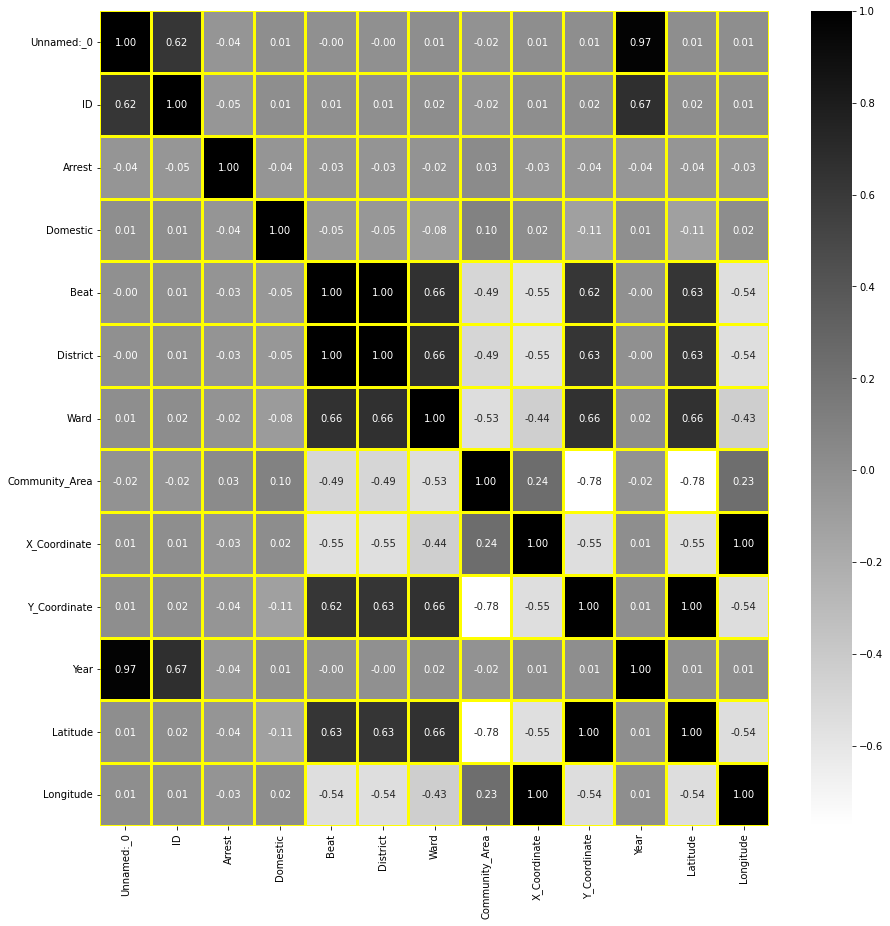

In [17]:
plt.figure(figsize = (15,15))

annot = True
linewidths = 2
linecolor = "yellow"

sns.heatmap(Sharen_Odd.corr(), 
            annot = annot, 
            fmt = '.2f', 
            cmap = "binary", 
            linewidths = linewidths, 
            linecolor = linecolor)

Fungsi .corr() digunakan untuk menemukan korelasi berpasangan dari semua kolom dalam kerangka data. Nilai na apa pun secara otomatis dikecualikan. Untuk kolom tipe data non-numerik apa pun dalam kerangka data, kolom ini diabaikan.

**Menampilkan beberapa scatterplot pada variabel dalam dataset Sharen_Odd**

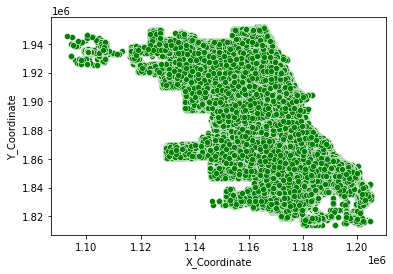

In [18]:
sns.scatterplot(x = Sharen_Odd.X_Coordinate, 
                y = Sharen_Odd.Y_Coordinate, 
                color='green');  

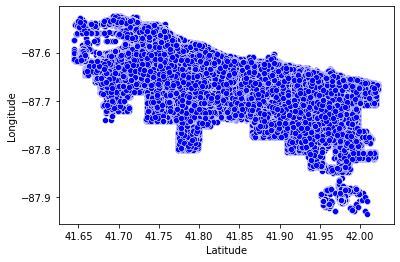

In [19]:
sns.scatterplot(x = Sharen_Odd.Latitude, 
                y = Sharen_Odd.Longitude, 
                color='blue');

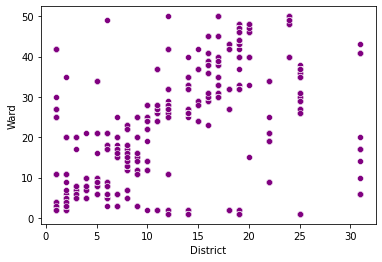

In [20]:
sns.scatterplot(x = Sharen_Odd.District, 
                y = Sharen_Odd.Ward, 
                color='purple');  

Scatterplot digunakan dengan beberapa pengelompokan semantik yang dapat membantu untuk memahami dengan baik dalam grafik dengan mem-plot grafik dua dimensi.Semua parameter kontrol semantik visual yang digunakan untuk mengidentifikasi himpunan bagian yang berbeda. 

**Menampilkan BLOXPOT**

AxesSubplot(0.125,0.125;0.775x0.755)


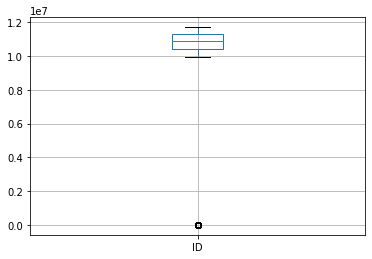

In [21]:
print(Sharen_Odd.boxplot(column = 'ID'))

AxesSubplot(0.125,0.125;0.775x0.755)


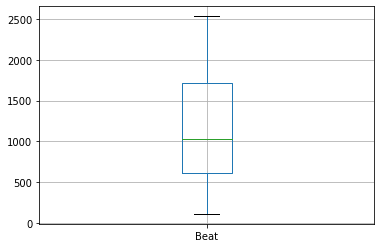

In [22]:
print(Sharen_Odd.boxplot(column = 'Beat'))

AxesSubplot(0.125,0.125;0.775x0.755)


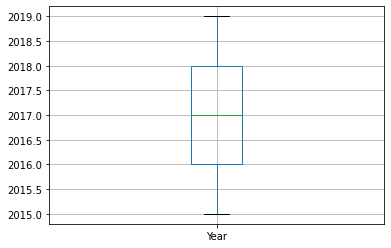

In [23]:
print(Sharen_Odd.boxplot(column = 'Year'))

Bloxpot adalah representasi visual dari ringkasan statistik dari kumpulan data yang diberikan. Bloxpot secara statistik merepresentasikan distribusi data melalui lima dimensi utama, yaitu nilai minimum, nilai maksimum, kuartil pertama, median (kuartil kedua), kuartil ketiga.

## 3. Data Preparation (30 pts.)

Dari hasil diatas, terdapat missing value pada kolom Location Description, X Coordinate, Y Coordinate, Latitude, Longitude, dan Location.

**Men-drop kolom yang memiliki missing value**

In [24]:
Sharen_Odd.dropna()

,Unnamed:_0,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,1024161,11254362,JB183495,03/12/2018 07:32:00 PM,017XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,RESTAURANT,False,...,1.0,24.0,08A,1164432.0,1905388.0,2018,05/04/2018 03:51:04 PM,41.896002,-87.671521,"(41.896002063, -87.671521286)"
1,428801,10540177,HZ285387,05/29/2016 11:28:00 PM,027XX S STATE ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,CHA APARTMENT,True,...,3.0,35.0,08B,1176730.0,1886544.0,2016,02/10/2018 03:50:01 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
2,1099812,11624449,JC187320,03/16/2019 02:10:00 AM,101XX S PRINCETON AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,9.0,49.0,03,1176072.0,1837879.0,2019,03/23/2019 04:03:16 PM,41.710497,-87.630797,"(41.710496583, -87.630796959)"
3,595228,11109388,JA459177,10/05/2017 11:00:00 AM,019XX W OGDEN AVE,0810,THEFT,OVER $500,HOSPITAL BUILDING/GROUNDS,False,...,2.0,28.0,06,1163312.0,1897077.0,2017,02/10/2018 03:50:01 PM,41.873220,-87.675869,"(41.873219626, -87.675868666)"
4,1033611,11241624,JB166623,02/26/2018 07:51:00 PM,067XX S COTTAGE GROVE AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,...,20.0,42.0,26,1182717.0,1860597.0,2018,05/04/2018 03:51:04 PM,41.772686,-87.605758,"(41.77268594, -87.605758495)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031739,540482,11182652,JA556030,12/19/2017 08:10:00 PM,076XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,...,8.0,69.0,08B,1183553.0,1854644.0,2017,05/04/2018 03:51:04 PM,41.756331,-87.602879,"(41.756330877, -87.602879293)"
1031740,750276,10880463,JA189513,03/16/2017 01:00:00 PM,028XX N MOBILE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,29.0,19.0,08B,1133917.0,1918303.0,2017,02/10/2018 03:50:01 PM,41.932034,-87.783294,"(41.932033636, -87.783293785)"
1031741,122985,10157277,HY346558,07/18/2015 09:30:00 PM,072XX S LOWE AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,17.0,68.0,05,1173398.0,1856921.0,2015,02/10/2018 03:50:01 PM,41.762810,-87.640028,"(41.762809823, -87.640027854)"
1031742,929773,11383727,JB354262,07/17/2018 10:56:00 PM,063XX S PEORIA DR,2021,NARCOTICS,POSS: BARBITUATES,STREET,True,...,16.0,68.0,18,1171390.0,1862990.0,2018,07/24/2018 04:15:32 PM,41.779508,-87.647210,"(41.779508069, -87.647210037)"


Data diatas sudah tidak memiliki missing value. Selanjutnya kita men-drop data yang terduplikat.

**Menghapus data yang terduplikat pada dataset Sharen_Odd**

In [25]:
Sharen_Odd.drop_duplicates()

,Unnamed:_0,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,1024161,11254362,JB183495,03/12/2018 07:32:00 PM,017XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,RESTAURANT,False,...,1.0,24.0,08A,1164432.0,1905388.0,2018,05/04/2018 03:51:04 PM,41.896002,-87.671521,"(41.896002063, -87.671521286)"
1,428801,10540177,HZ285387,05/29/2016 11:28:00 PM,027XX S STATE ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,CHA APARTMENT,True,...,3.0,35.0,08B,1176730.0,1886544.0,2016,02/10/2018 03:50:01 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
2,1099812,11624449,JC187320,03/16/2019 02:10:00 AM,101XX S PRINCETON AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,9.0,49.0,03,1176072.0,1837879.0,2019,03/23/2019 04:03:16 PM,41.710497,-87.630797,"(41.710496583, -87.630796959)"
3,595228,11109388,JA459177,10/05/2017 11:00:00 AM,019XX W OGDEN AVE,0810,THEFT,OVER $500,HOSPITAL BUILDING/GROUNDS,False,...,2.0,28.0,06,1163312.0,1897077.0,2017,02/10/2018 03:50:01 PM,41.873220,-87.675869,"(41.873219626, -87.675868666)"
4,1033611,11241624,JB166623,02/26/2018 07:51:00 PM,067XX S COTTAGE GROVE AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,...,20.0,42.0,26,1182717.0,1860597.0,2018,05/04/2018 03:51:04 PM,41.772686,-87.605758,"(41.77268594, -87.605758495)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031739,540482,11182652,JA556030,12/19/2017 08:10:00 PM,076XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,...,8.0,69.0,08B,1183553.0,1854644.0,2017,05/04/2018 03:51:04 PM,41.756331,-87.602879,"(41.756330877, -87.602879293)"
1031740,750276,10880463,JA189513,03/16/2017 01:00:00 PM,028XX N MOBILE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,29.0,19.0,08B,1133917.0,1918303.0,2017,02/10/2018 03:50:01 PM,41.932034,-87.783294,"(41.932033636, -87.783293785)"
1031741,122985,10157277,HY346558,07/18/2015 09:30:00 PM,072XX S LOWE AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,17.0,68.0,05,1173398.0,1856921.0,2015,02/10/2018 03:50:01 PM,41.762810,-87.640028,"(41.762809823, -87.640027854)"
1031742,929773,11383727,JB354262,07/17/2018 10:56:00 PM,063XX S PEORIA DR,2021,NARCOTICS,POSS: BARBITUATES,STREET,True,...,16.0,68.0,18,1171390.0,1862990.0,2018,07/24/2018 04:15:32 PM,41.779508,-87.647210,"(41.779508069, -87.647210037)"


Karena sudah tidak ada lagi data yang missing value ataupun terduplikat, kita kembali mengecek bentuk dari dataset Sharen_Odd.

In [26]:
Sharen_Odd.shape

(1031744, 23)

Dari hasil diatas, karena Shape nya sama yaitu 1031744 baris dan 23 kolom, maka dapat disimpulkan sudah tidak ada lagi data yang duplikat.

**Numerical Columns**

In [27]:
NumColumns = Sharen_Odd.select_dtypes(include=[np.float, np.int]).columns
print("Numerical columns : " )
print(NumColumns)

scaler_numerical = StandardScaler()
Numerical_transform = Pipeline(steps=[('scale', scaler_numerical)])

Numerical columns : 
Index(['Unnamed:_0', 'ID', 'Beat', 'District', 'Ward', 'Community_Area',
       'X_Coordinate', 'Y_Coordinate', 'Year', 'Latitude', 'Longitude'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/dev

Dari hasil diatas :

Numerical columns : 

Index(['Unnamed:_0', 'ID', 'Beat', 'District', 'Ward', 'Community_Area',
       'X_Coordinate', 'Y_Coordinate', 'Year', 'Latitude', 'Longitude']

In [28]:
CategColumns = Sharen_Odd.select_dtypes(include=[np.object, np.bool]).columns
print("Categorical columns : " )
print(CategColumns)

impute_categorical = SimpleImputer(strategy="most_frequent")
onehot_categorical = OneHotEncoder(handle_unknown="ignore")
Categorical_transform = Pipeline(steps=[('impute', impute_categorical),('onehot', onehot_categorical)])

Categorical columns : 
Index(['Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type', 'Description',
       'Location_Description', 'Arrest', 'Domestic', 'FBI_Code', 'Updated_On',
       'Location'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Dari hasil diatas :

Categorical columns : 

Index(['Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type', 'Description',
       'Location_Description', 'Arrest', 'Domestic', 'FBI_Code', 'Updated_On',
       'Location']

###**FEATURE ENGINEERING**

**Di bagian HINT soal diminta untuk generate the target by performing engineering on 'DATE' and 'PRIMARY TYPE'. Namun, kedua fitur tersebut memiliki datatype OBJECT yang merupakan categorical, sehingga harus di ubah menjadi numerical terlebih dahulu.**

**Pertama, mengubah datatype kolom 'Date' dari OBJECT menjadi datetime64[ns]**

In [29]:
Sharen_Odd['Date'] = pd.to_datetime(Sharen_Odd['Date'])
Sharen_Odd['Year'] = Sharen_Odd['Date'].dt.year
Sharen_Odd['Month'] = Sharen_Odd['Date'].dt.month
Sharen_Odd['Day'] = Sharen_Odd['Date'].dt.day
Sharen_Odd['Hour'] = Sharen_Odd['Date'].dt.hour

In [30]:
print(Sharen_Odd.Date)

0         2018-03-12 19:32:00
1         2016-05-29 23:28:00
2         2019-03-16 02:10:00
3         2017-10-05 11:00:00
4         2018-02-26 19:51:00
                  ...        
1031739   2017-12-19 20:10:00
1031740   2017-03-16 13:00:00
1031741   2015-07-18 21:30:00
1031742   2018-07-17 22:56:00
1031743   2016-09-21 13:10:00
Name: Date, Length: 1031744, dtype: datetime64[ns]


**Kedua, mengubah datatype kolom 'Primary_Type' dari OBJECT menjadi INT**

In [31]:
Sharen_Odd['Primary_Type'] = pd.factorize(Sharen_Odd['Primary_Type'])[0]

In [32]:
print(Sharen_Odd.Primary_Type)

0           0
1           1
2           2
3           3
4           4
           ..
1031739     1
1031740     1
1031741    14
1031742     9
1031743     4
Name: Primary_Type, Length: 1031744, dtype: int64


**Data types terbaru dari yang sudah di update**

In [33]:
Sharen_Odd.dtypes

Unnamed:_0                       int64
ID                               int64
Case_Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary_Type                     int64
Description                     object
Location_Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community_Area                 float64
FBI_Code                        object
X_Coordinate                   float64
Y_Coordinate                   float64
Year                             int64
Updated_On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Month                            int64
Day                              int64
Hour                     

Dari hasil diatas, dapat dilihat variabel Date sudah berubah datatype menadi Datetime dan variabel Primary_Type sudah berubah datatype menjadi Integer.

**Data Visualization**

Visualiasi Data kolom 'Date'

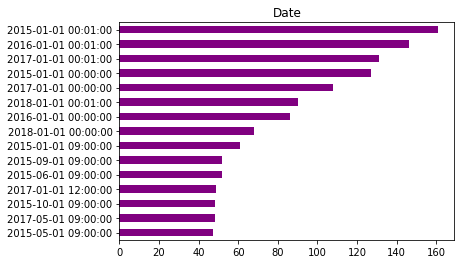

In [34]:
Sharen_Odd['Date'].value_counts()[:15].sort_values(ascending=True).plot(kind='barh', 
                                                                          title='Date',
                                                                          color='purple')

Visualiasi Data kolom 'Primary_Type'

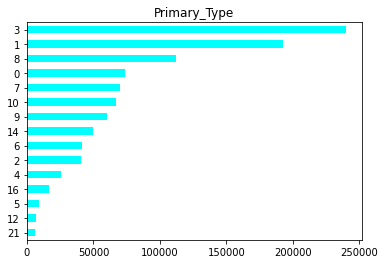

In [35]:
Sharen_Odd['Primary_Type'].value_counts()[:15].sort_values(ascending=True).plot(kind='barh', 
                                                                               title='Primary_Type',
                                                                                color='cyan')

Visualisasi scatterplot kolom 'Date' dan 'Primary_Type'

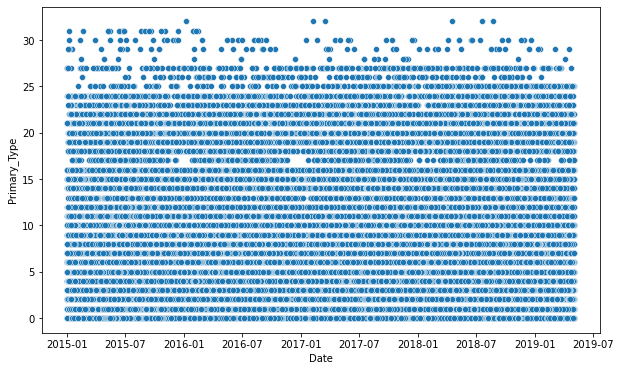

In [36]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='Date',y='Primary_Type', data=Sharen_Odd)

Masing-masing teknik dikelompokkan berdasarkan kolom yang mereka butuhkan untuk diterapkan menggunakan **ColumnTransformer**. Idealnya, ini dijalankan dalam pipeline tepat sebelum model dilatih. Namun, untuk memahami seperti apa tampilan data, biasanya data akan diubah menjadi variabel sementara.

In [37]:
PreprocessorCategoricalCol = ColumnTransformer(transformers=[('categorical', 
                                                              Categorical_transform,
                                                              CategColumns)],
                                                              remainder="passthrough")

PreprocessorAllCol = ColumnTransformer(transformers=[('categorical', 
                                                              Categorical_transform,
                                                              CategColumns),
                                                     ('Numerical', 
                                                              Numerical_transform,
                                                              NumColumns)],
                                                              remainder="passthrough")

In [38]:
Sharen_Odd_temp_1 = PreprocessorCategoricalCol.fit_transform(Sharen_Odd)
print("Data seleah di transform :")
print(Sharen_Odd_temp_1)

Sharen_Odd_temp_2 = PreprocessorAllCol.fit_transform(Sharen_Odd)
print("Data seleah di transform :")
print(Sharen_Odd_temp_2)

Data seleah di transform :
  (0, 757539)	1.0
  (0, 1371188)	1.0
  (0, 1511526)	1.0
  (0, 1535905)	1.0
  (0, 1536188)	1.0
  (0, 1536494)	1.0
  (0, 1536673)	1.0
  (0, 1536706)	1.0
  (0, 1536708)	1.0
  (0, 1536719)	1.0
  (0, 1537556)	1.0
  (0, 1735021)	1.0
  (0, 1841057)	1024161.0
  (0, 1841058)	11254362.0
  (0, 1841059)	1213.0
  (0, 1841060)	12.0
  (0, 1841061)	1.0
  (0, 1841062)	24.0
  (0, 1841063)	1164432.0
  (0, 1841064)	1905388.0
  (0, 1841065)	2018.0
  (0, 1841066)	41.896002063
  (0, 1841067)	-87.671521286
  (0, 1841068)	3.0
  (0, 1841069)	12.0
  :	:
  (1031743, 1213459)	1.0
  (1031743, 1516498)	1.0
  (1031743, 1535978)	1.0
  (1031743, 1536192)	1.0
  (1031743, 1536515)	1.0
  (1031743, 1536684)	1.0
  (1031743, 1536706)	1.0
  (1031743, 1536708)	1.0
  (1031743, 1536735)	1.0
  (1031743, 1536960)	1.0
  (1031743, 1782673)	1.0
  (1031743, 1841057)	337187.0
  (1031743, 1841058)	10689428.0
  (1031743, 1841059)	1934.0
  (1031743, 1841060)	19.0
  (1031743, 1841061)	44.0
  (1031743, 1841062)	6.

Dari hasil data transforming diatas, terdapat beberapa nilai. Ada yang termasuk ke level crime Low(0-14), medium(15-33), dan high(34 and above)

**Plot grafik antara Date(Hour,Day,Month,Year) dengan jumlah crime pada Primary_Type**

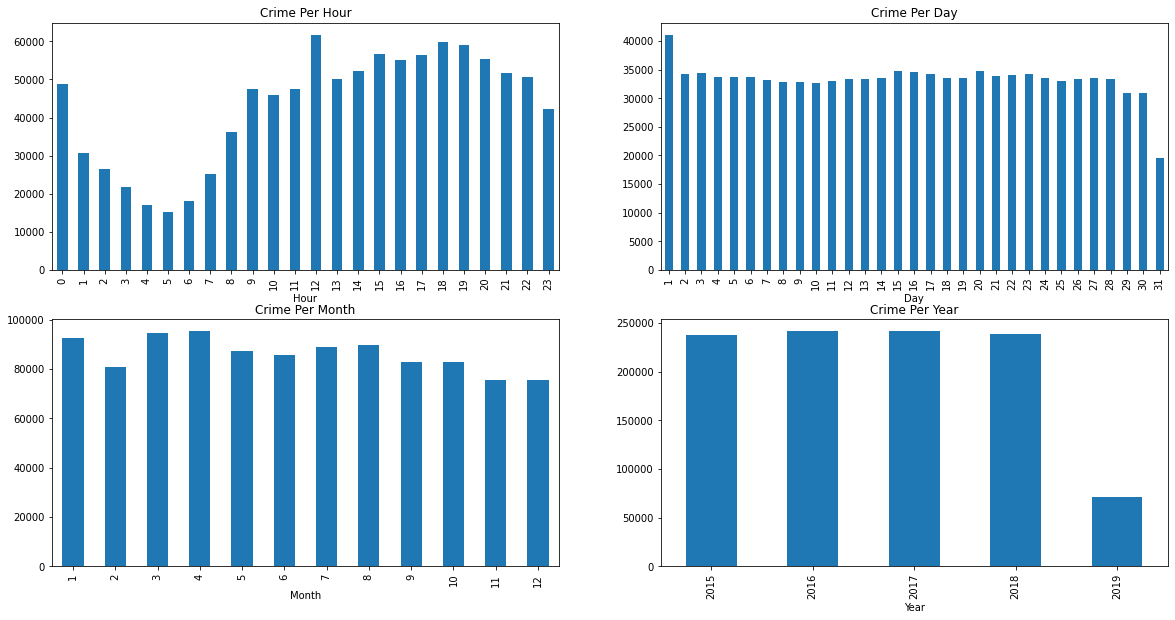

In [39]:
ig, axes = plt.subplots(2, 2, figsize=(20, 10))

Sharen_Odd.groupby('Hour').count()['Primary_Type'].plot(kind='bar', title='Crime Per Hour', ax=axes[0,0])
Sharen_Odd.groupby('Day').count()['Primary_Type'].plot(kind='bar', title='Crime Per Day', ax=axes[0,1])
Sharen_Odd.groupby('Month').count()['Primary_Type'].plot(kind='bar', title='Crime Per Month', ax=axes[1,0])
Sharen_Odd.groupby('Year').count()['Primary_Type'].plot(kind='bar', title='Crime Per Year', ax=axes[1,1])

**Melihat korelasi**

In [40]:
corr = Sharen_Odd.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed:_0,ID,Primary_Type,Arrest,Domestic,Beat,District,Ward,Community_Area,X_Coordinate,Y_Coordinate,Year,Latitude,Longitude,Month,Day,Hour
Unnamed:_0,1.000000,0.619242,-0.018518,-0.038335,0.009086,-0.002889,-0.002882,0.014496,-0.015820,0.012545,0.008968,0.972282,0.008901,0.012798,-0.344569,-0.023802,-0.004619
ID,0.619242,1.000000,-0.124232,-0.047438,0.011389,0.005324,0.005378,0.020361,-0.024534,0.010323,0.021032,0.668731,0.020947,0.010740,0.057405,0.003543,-0.002634
Primary_Type,-0.018518,-0.124232,1.000000,0.152579,-0.208837,0.006367,0.006365,-0.010559,0.026138,-0.043487,-0.021171,-0.020240,-0.020954,-0.044184,-0.009783,-0.005436,-0.007431
Arrest,-0.038335,-0.047438,0.152579,1.000000,-0.035033,-0.031986,-0.032082,-0.023560,0.034056,-0.028767,-0.040441,-0.045000,-0.040240,-0.029623,-0.033944,0.000546,0.064174
Domestic,0.009086,0.011389,-0.208837,-0.035033,1.000000,-0.054418,-0.054452,-0.081570,0.096904,0.017577,-0.111847,0.007442,-0.111680,0.015962,-0.009358,-0.000066,-0.039845
Beat,-0.002889,0.005324,0.006367,-0.031986,-0.054418,1.000000,0.999723,0.659778,-0.485325,-0.547681,0.624609,-0.002826,0.625438,-0.542703,0.001895,-0.002569,-0.008228
District,-0.002882,0.005378,0.006365,-0.032082,-0.054452,0.999723,1.000000,0.661105,-0.485908,-0.548559,0.625830,-0.002817,0.626660,-0.543568,0.001908,-0.002611,-0.008154
Ward,0.014496,0.020361,-0.010559,-0.023560,-0.081570,0.659778,0.661105,1.000000,-0.533907,-0.438736,0.656941,0.016120,0.657259,-0.432346,0.004973,-0.001007,0.000306
Community_Area,-0.015820,-0.024534,0.026138,0.034056,0.096904,-0.485325,-0.485908,-0.533907,1.000000,0.243417,-0.775952,-0.018341,-0.775239,0.233717,-0.008267,-0.000668,0.001835
X_Coordinate,0.012545,0.010323,-0.043487,-0.028767,0.017577,-0.547681,-0.548559,-0.438736,0.243417,1.000000,-0.546065,0.014228,-0.548815,0.999918,0.005542,0.004054,-0.005789


A value closer to 0 implies weaker correlation 

A value closer to 1 implies stronger positive correlation

A value closer to -1 implies stronger negative correlation

**Machine Learning tidak dapat menggunakan teks sederhana. Kita harus mengubah data dari teks menjadi angka. Oleh karena itu, untuk setiap string yang merupakan kelas, kami menetapkan label yang berupa angka.**

Misalnya, dalam kumpulan data 'Date' pelanggan, mereka diklasifikasikan menjadi 3 bagian, yaitu high, medium, atau low dan diberi label 0, 1, atau 2. Kami menggunakan kelas LabelEncoder yang disediakan oleh Sklearn untuk ini.

Oleh karena itu, variabel 'Date' akan di LabelEncoder agar bisa dipakai sebagai data numerical.

In [41]:
features = []
features = Sharen_Odd.drop(['Date'], axis = 1)

Label_Date = pd.DataFrame(Sharen_Odd, columns = ['Date'])
Label_encorder = LabelEncoder()
Label = Sharen_Odd['Date']

Label = Label_encorder.fit_transform(Label)
print("Nilai 'Date' setelah diberi label encoder : "+str(Label))

Nilai 'Date' setelah diberi label encoder : [339569 146852 455574 ...  56455 380484 181840]


**Splitting data for training and testing**

In [42]:
X = Label.reshape(-1, 1)
y = Sharen_Odd['Primary_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Training dan testing split was successfulpada dataset HousingData : BERHASIL")

Training dan testing split was successfulpada dataset HousingData : BERHASIL


## 4. Build and Assess the machine learning models (35 pts.)

###**Mencoba Model ML**

**You have to evaluate the machine learning models using at least two performance metrics (for example: precision and recall)**. 

### First Model : Logistic Regression

In [43]:
LG = LogisticRegression()
LG.fit(X_train,y_train)
pred_LG = LG.predict(X_test)

confusion_matrix(y_test, pred_LG)

print ('\n confussion matrix Logistic Regression :\n',confusion_matrix(y_test, pred_LG))


 confussion matrix Logistic Regression :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [44]:
print ('Accuracy:', accuracy_score(y_test, pred_LG))

Accuracy: 0.23304692535461766


In [45]:
Class_report_LogistrikRegression = print(classification_report(y_test, pred_LG))
Class_report_LogistrikRegression

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14860
           1       0.00      0.00      0.00     38522
           2       0.00      0.00      0.00      8122
           3       0.23      1.00      0.38     48089
           4       0.00      0.00      0.00      5122
           5       0.00      0.00      0.00      1862
           6       0.00      0.00      0.00      8175
           7       0.00      0.00      0.00     13718
           8       0.00      0.00      0.00     22326
           9       0.00      0.00      0.00     11932
          10       0.00      0.00      0.00     13473
          11       0.00      0.00      0.00       945
          12       0.00      0.00      0.00      1277
          13       0.00      0.00      0.00       145
          14       0.00      0.00      0.00      9997
          15       0.00      0.00      0.00       831
          16       0.00      0.00      0.00      3447
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Second Model : KNeighborsClassifier (KNN)

In [46]:
knn = KNN()
knn.fit(X_train, y_train)
pred_KNN = knn.predict(X_test)

confusion_matrix(y_test, pred_KNN)

print ('\n confussion matrix KNN:\n',confusion_matrix(y_test, pred_KNN))


 confussion matrix KNN:
 [[ 2100  4615   356 ...     0     0     0]
 [ 5147 13165  1110 ...     0     0     0]
 [ 1097  2760   295 ...     0     0     0]
 ...
 [    0     1     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     1     0 ...     0     0     0]]


In [47]:
print ('Accuracy KNN:', accuracy_score(y_test, pred_KNN))

Accuracy KNN: 0.19013903629288245


In [48]:
Class_report_KNN = print(classification_report(y_test, pred_KNN))
Class_report_KNN

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.08      0.14      0.10     14860
           1       0.22      0.34      0.27     38522
           2       0.05      0.04      0.04      8122
           3       0.26      0.38      0.31     48089
           4       0.03      0.01      0.01      5122
           5       0.16      0.04      0.06      1862
           6       0.06      0.03      0.04      8175
           7       0.18      0.14      0.15     13718
           8       0.13      0.09      0.10     22326
           9       0.14      0.06      0.08     11932
          10       0.07      0.03      0.04     13473
          11       0.00      0.00      0.00       945
          12       0.01      0.00      0.00      1277
          13       0.00      0.00      0.00       145
          14       0.08      0.03      0.04      9997
          15       0.00      0.00      0.00       831
          16       0.06      0.01      0.01      3447
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Third Model : Decision Tree  Classifier(DTC)

In [49]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
pred_DTC = DTC.predict(X_test)

confusion_matrix(y_test, pred_DTC)

print ('\n confussion matrix DTC:\n',confusion_matrix(y_test, pred_DTC))


 confussion matrix DTC:
 [[ 1553  3541   546 ...     0     0     0]
 [ 3770 10119  1655 ...     2     0     0]
 [  790  2137   400 ...     0     0     0]
 ...
 [    0     0     1 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]


In [50]:
print ('Accuracy DTC:', accuracy_score(y_test, pred_DTC))

Accuracy DTC: 0.186208801593417


In [51]:
Class_report_DTC = print(classification_report(y_test, pred_DTC))
Class_report_DTC

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.08      0.10      0.09     14860
           1       0.22      0.26      0.24     38522
           2       0.05      0.05      0.05      8122
           3       0.27      0.40      0.32     48089
           4       0.03      0.02      0.02      5122
           5       0.10      0.05      0.07      1862
           6       0.05      0.03      0.04      8175
           7       0.18      0.17      0.17     13718
           8       0.13      0.09      0.11     22326
           9       0.14      0.09      0.11     11932
          10       0.08      0.04      0.05     13473
          11       0.00      0.00      0.00       945
          12       0.01      0.01      0.01      1277
          13       0.00      0.00      0.00       145
          14       0.07      0.03      0.04      9997
          15       0.00      0.00      0.00       831
          16       0.05      0.03      0.04      3447
          17       0.01    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Fourth Model : GaussianNB

In [53]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
pred_NB = NB.predict(X_test)

confusion_matrix(y_test, pred_NB)

print ('\n confussion matrix pred_NB:\n',confusion_matrix(y_test, pred_NB))


 confussion matrix pred_NB:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [54]:
print ('Accuracy NB:', accuracy_score(y_test, pred_NB))

Accuracy NB: 0.23304692535461766


In [55]:
Class_report_NB = print(classification_report(y_test, pred_NB))
Class_report_NB

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14860
           1       0.00      0.00      0.00     38522
           2       0.00      0.00      0.00      8122
           3       0.23      1.00      0.38     48089
           4       0.00      0.00      0.00      5122
           5       0.00      0.00      0.00      1862
           6       0.00      0.00      0.00      8175
           7       0.00      0.00      0.00     13718
           8       0.00      0.00      0.00     22326
           9       0.00      0.00      0.00     11932
          10       0.00      0.00      0.00     13473
          11       0.00      0.00      0.00       945
          12       0.00      0.00      0.00      1277
          13       0.00      0.00      0.00       145
          14       0.00      0.00      0.00      9997
          15       0.00      0.00      0.00       831
          16       0.00      0.00      0.00      3447
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5. Choose your Final Model (3 pts.)

**You finally have your final model. Write comments to justify your final model**

###**KESIMPULAN :**

**Confusion matrix** dapat mengetahui keakuratan dari model yang kita buat dengan performance metrics seperti: accuracy, recall, dan precision.

**Recall** menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi. Maka, recall merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. 

Pada dataset Sharen_Odd, dapat dilihat bahwa data menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif. Oleh sebab itu, dalam pemilihan model sebaiknya dapat dilihat dari Precision-nya.

Berdasarkan pengujian terhadap beberapa model ML, saya memilih model ketiga : **Decision Tree Classifier(DTC)**. Dapat dilihat dari nilai precision dan recallnya, Model DTC ini memliki nilai yang lebih tinggi dari model-model lainnya. 